# Produce Hydro Profile Using EIA data
---

**EIA**: Energy Information Administration

Monthly capacity factors for hydro plant across the country are reported by EIA [here](https://www.eia.gov/electricity/annual/html/epa_04_08_b.html). The table is extracted from the [Electric Annual Power 2017](https://www.eia.gov/electricity/annual/pdf/epa.pdf) report, which enclose a mine of information useful for this project.

The quoted capacity factors are used in this notebook to produce an hydro profile. A unique number is given for each month and for the entire country. First, we produce hourly capacity factors by interpolating the monthly data. Then, the same capacity factor is used for each hydro plant across the country. Given the geographic diverdity of the U.S., this is a strong assumption.

In [1]:
import matplotlib.pyplot as plt
from westernintnet.westernintnet import win_data
from prereise.gather.hydrodata.eia import eia

c:\program files\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


## 1. Get Profile

In [2]:
data = eia.get_profile(start='2016-01-01-00', end='2016-12-31-23')
print("There are %d hydro plants in the Western grid" % len(data.columns))

There are 715 hydro plants in the Western grid


In [3]:
data.head(n=24)

,0,1,2,3,4,5,6,8,9,12,...,2460,2465,2466,2467,2468,2469,2470,2471,2472,2473
2016-01-01 00:00:00,66.420728,66.419336,66.419336,66.419336,66.419336,66.419336,5.379716,14.596129,14.596129,90.329182,...,44.405596,3.503071,3.503071,3.503071,3.503071,3.503071,3.503071,3.127742,11.259871,11.259871
2016-01-01 01:00:00,66.429719,66.428327,66.428327,66.428327,66.428327,66.428327,5.380444,14.598105,14.598105,90.341410,...,44.411607,3.503545,3.503545,3.503545,3.503545,3.503545,3.503545,3.128165,11.261396,11.261396
2016-01-01 02:00:00,66.438710,66.437318,66.437318,66.437318,66.437318,66.437318,5.381172,14.600080,14.600080,90.353637,...,44.417618,3.504019,3.504019,3.504019,3.504019,3.504019,3.504019,3.128589,11.262920,11.262920
2016-01-01 03:00:00,66.447701,66.446309,66.446309,66.446309,66.446309,66.446309,5.381901,14.602056,14.602056,90.365865,...,44.423629,3.504494,3.504494,3.504494,3.504494,3.504494,3.504494,3.129012,11.264444,11.264444
2016-01-01 04:00:00,66.456692,66.455299,66.455299,66.455299,66.455299,66.455299,5.382629,14.604032,14.604032,90.378092,...,44.429640,3.504968,3.504968,3.504968,3.504968,3.504968,3.504968,3.129436,11.265968,11.265968
2016-01-01 05:00:00,66.465683,66.464290,66.464290,66.464290,66.464290,66.464290,5.383357,14.606008,14.606008,90.390320,...,44.435651,3.505442,3.505442,3.505442,3.505442,3.505442,3.505442,3.129859,11.267492,11.267492
2016-01-01 06:00:00,66.474674,66.473281,66.473281,66.473281,66.473281,66.473281,5.384085,14.607984,14.607984,90.402547,...,44.441662,3.505916,3.505916,3.505916,3.505916,3.505916,3.505916,3.130282,11.269017,11.269017
2016-01-01 07:00:00,66.483665,66.482272,66.482272,66.482272,66.482272,66.482272,5.384813,14.609959,14.609959,90.414774,...,44.447673,3.506390,3.506390,3.506390,3.506390,3.506390,3.506390,3.130706,11.270541,11.270541
2016-01-01 08:00:00,66.492656,66.491263,66.491263,66.491263,66.491263,66.491263,5.385542,14.611935,14.611935,90.427002,...,44.453684,3.506864,3.506864,3.506864,3.506864,3.506864,3.506864,3.131129,11.272065,11.272065
2016-01-01 09:00:00,66.501647,66.500254,66.500254,66.500254,66.500254,66.500254,5.386270,14.613911,14.613911,90.439229,...,44.459695,3.507339,3.507339,3.507339,3.507339,3.507339,3.507339,3.131553,11.273589,11.273589


## 2. Plot Profile by Zone
The daily power output is shown below. Note that the shape of the curve is the same since the same capacity factors is used for each hydro plant. However the total power output varies from one state to an other since the number of plants in a state as well as the intrinsinc capacity of the plant differ.

In [4]:
zones = ['Oregon', 'Washington', 'Nevada', 'Colorado']

In [5]:
def get_plant_id(zone):
    plant_id = []
    if zone == 'Western':
        try:
            plant_id = win_data.genbus.groupby('type').get_group(
                'hydro').index.values.tolist()
        except KeyError:
            pass
    elif zone == 'California':
        CA = ['Bay Area', 'Central California', 'Northern California',
              'Southeast California', 'Southwest California']
        for load_zone in CA:
            try:
                plant_id += win_data.genbus.groupby(
                    ['ZoneName', 'type']).get_group(
                    (load_zone, 'hydro')).index.values.tolist()
            except KeyError:
                pass
    else:
        try:
            plant_id = win_data.genbus.groupby(
                ['ZoneName', 'type']).get_group(
                (zone, 'hydro')).index.values.tolist()
        except KeyError:
            pass
    
    return plant_id

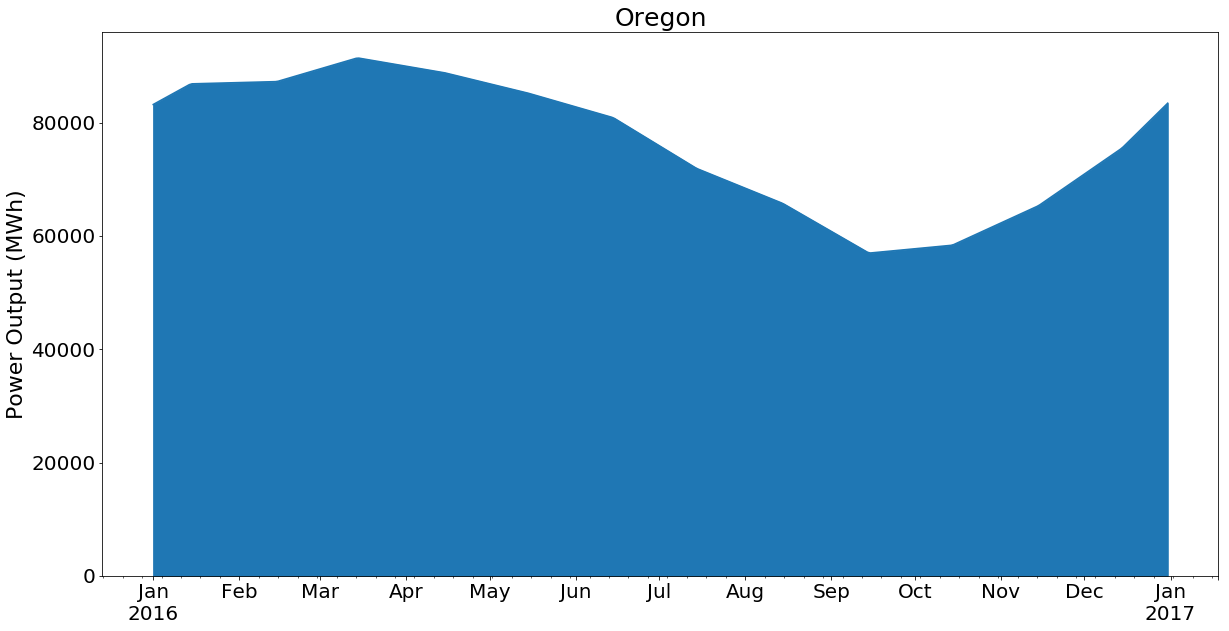

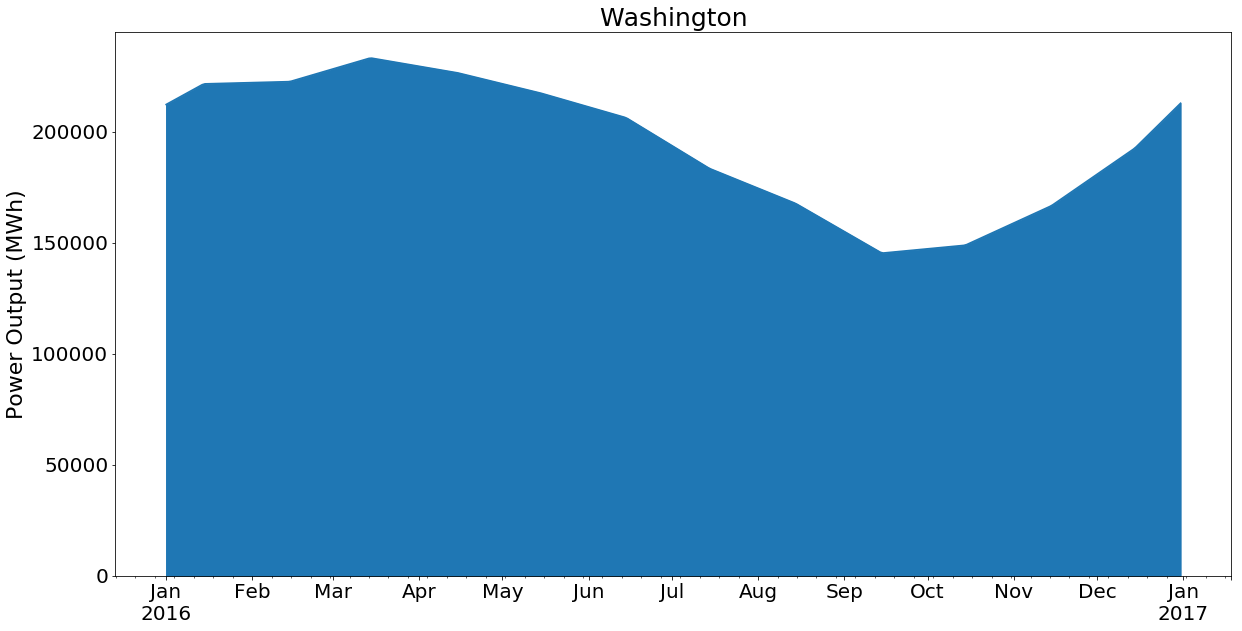

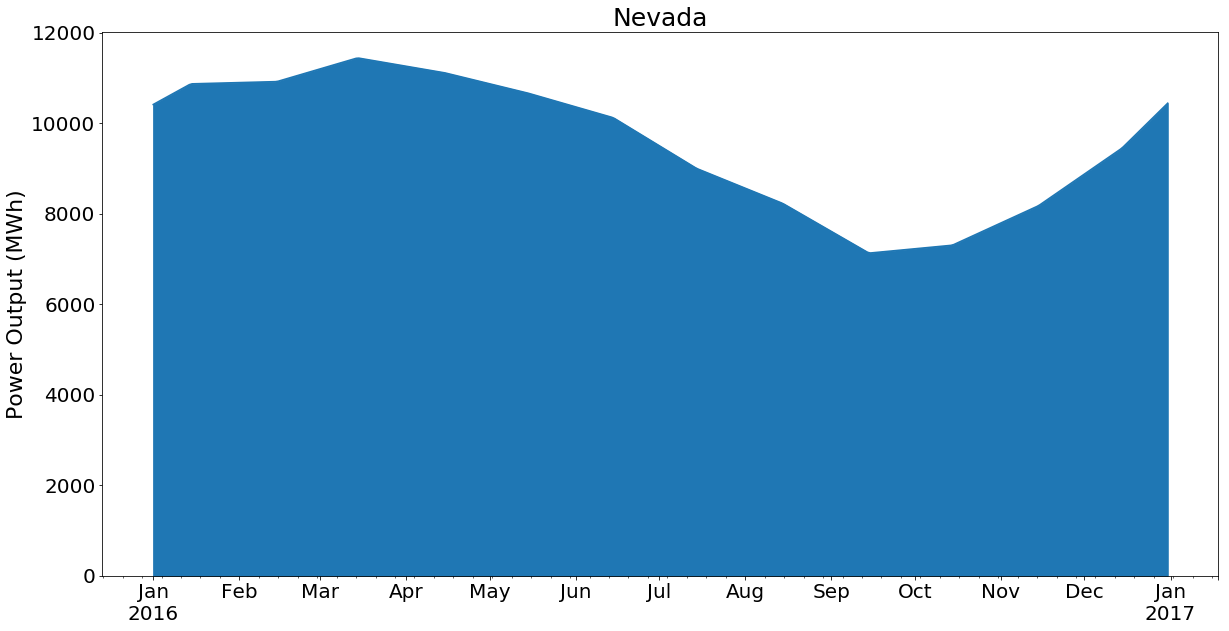

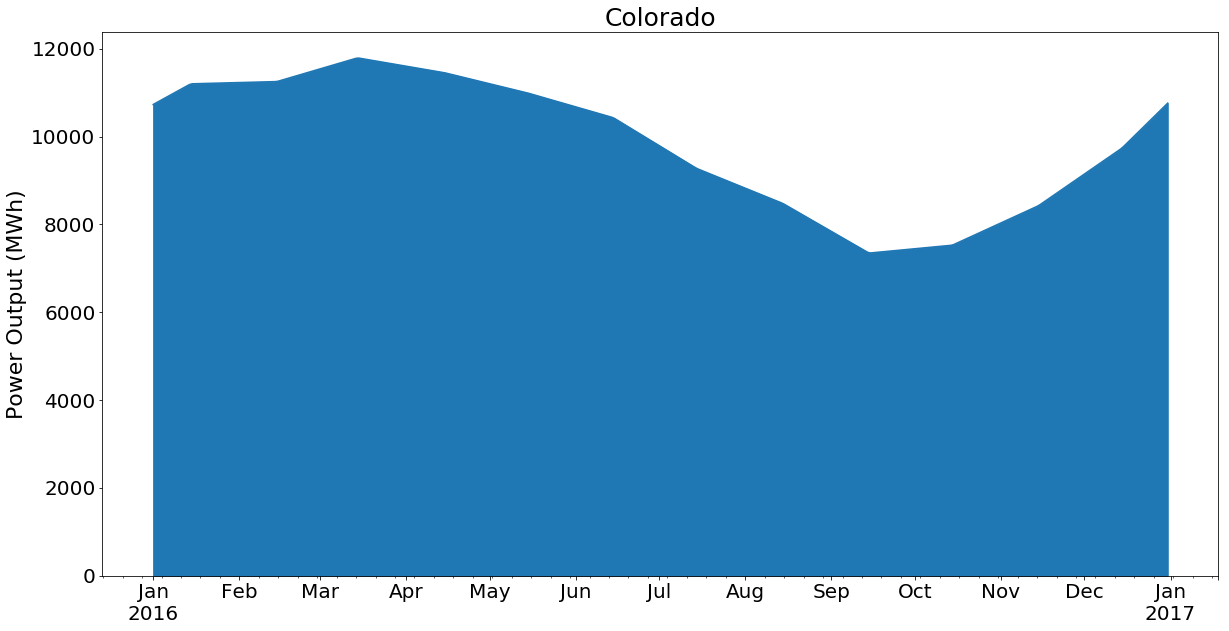

In [6]:
for z in zones:
    fig = plt.figure(figsize=(20, 10))
    plt.title('%s' % z, fontsize=25)
    ax = fig.gca()
    ax.grid(color='black', axis='y')
    ax.tick_params(which='both', labelsize=20)
    ax.set_ylabel('Power Output (MWh)', fontsize=22)

    data[get_plant_id(z)].resample('D', label='left').sum().sum(axis=1).plot(kind='area', ax=ax)

plt.show()